# TRATAMENTO DOS DADOS

In [1]:
# Importando as bibliotecas
import pandas as pd
#from lerMicrodados import lerMicrodados
import matplotlib
import statistics as sts
import numpy as np

In [2]:
#lerMicrodados.ler_PNAD("Dados_20170517.zip", 2015, header=True)

In [3]:
#Importando a base de dados
arquivo = 'DOM2015.csv'
dataset = pd.read_csv(arquivo, sep=',' ,header=0)

In [4]:
dataset.head()

,V0101,V0102,V0103,V0104,V0105,V0106,V0201,V0202,V0203,V0204,...,V4620,V4621,V4622,V4624,V4628,V4629,V4630,V4632,V4633,V9992
0,2015,11000015,1,1,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,800.0,4.0,1.0,1,156703.0,11021.0,76735.0,11021.0,20170504
1,2015,11000015,2,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,20170504
2,2015,11000015,3,1,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,1150.0,4.0,1.0,1,150490.0,11041.0,47545.0,11041.0,20170504
3,2015,11000015,4,1,6.0,4.0,1.0,2.0,1.0,1.0,...,6.0,793.0,4.0,2.0,1,150490.0,11041.0,47545.0,11041.0,20170504
4,2015,11000015,5,1,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,2900.0,6.0,2.0,1,62134.0,11044.0,NaN,NaN,20170504


In [5]:
##Deixando apenas as colunas que interessam
dataset = pd.read_csv(arquivo, sep=',', usecols=["V0101", "V0102", "V0105", "V0202", "V0203", "V0204", "V0205", "V0206", 
                                                "V0208", "V0211", "V2016", "V0219", "V4621"])

In [6]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
dataset.head()

,V0101,V0102,V0105,V0202,V0203,V0204,V0205,V0206,V0208,V0211,V2016,V0219,V4621
0,2015,11000015,1.0,4.0,1.0,1.0,4.0,1.0,500.0,1.0,1.0,1.0,800.0
1,2015,11000015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,11000015,1.0,4.0,1.0,1.0,2.0,1.0,350.0,1.0,1.0,1.0,1150.0
3,2015,11000015,6.0,2.0,1.0,1.0,7.0,4.0,NaN,1.0,1.0,1.0,793.0
4,2015,11000015,2.0,2.0,1.0,1.0,7.0,2.0,NaN,1.0,3.0,1.0,2900.0


In [8]:
##Renomeando as variáveis
dataset.rename(columns={'V0101': 'ano', 'V0102': 'controle', 'V0105': 'moradores', 'V0202': 'tipo_dom', 'V0203': 'material_parede',
                       'V0204': 'material_telhado', 'V0205': 'comodos', 'V0206': 'quartos', 'V0208': 'aluguel',
                       'V0211': 'agua', 'V2016': 'banheiros', 'V0219': 'energia', 'V4621': 'rendapc'}, inplace=True)

In [9]:
#Visualização dos dados
dataset.head()

,ano,controle,moradores,tipo_dom,material_parede,material_telhado,comodos,quartos,aluguel,agua,banheiros,energia,rendapc
0,2015,11000015,1.0,4.0,1.0,1.0,4.0,1.0,500.0,1.0,1.0,1.0,800.0
1,2015,11000015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,11000015,1.0,4.0,1.0,1.0,2.0,1.0,350.0,1.0,1.0,1.0,1150.0
3,2015,11000015,6.0,2.0,1.0,1.0,7.0,4.0,NaN,1.0,1.0,1.0,793.0
4,2015,11000015,2.0,2.0,1.0,1.0,7.0,2.0,NaN,1.0,3.0,1.0,2900.0


In [10]:
dataset.count()

ano                 151189
controle            151189
moradores           117939
tipo_dom            117601
material_parede     117601
material_telhado    117601
comodos             117601
quartos             117601
aluguel              20770
agua                117601
banheiros           114713
energia             117601
rendapc             117939
dtype: int64

In [11]:
#Valores missing
dataset.isnull().sum()

ano                      0
controle                 0
moradores            33250
tipo_dom             33588
material_parede      33588
material_telhado     33588
comodos              33588
quartos              33588
aluguel             130419
agua                 33588
banheiros            36476
energia              33588
rendapc              33250
dtype: int64

In [12]:
# Removendo linhas onde nao existam valores de aluguel
dataset = dataset.dropna(subset=['aluguel'])

In [13]:
dataset.count()

ano                 20770
controle            20770
moradores           20770
tipo_dom            20770
material_parede     20770
material_telhado    20770
comodos             20770
quartos             20770
aluguel             20770
agua                20770
banheiros           20587
energia             20770
rendapc             20770
dtype: int64

In [14]:
# Removendo linhas onde nao existam valores de aluguel
# Outra maneira de realizar a remoção
# dataset = dataset[pd.notnull(dataset['aluguel'])]

In [15]:
dataset.isnull().sum()

ano                   0
controle              0
moradores             0
tipo_dom              0
material_parede       0
material_telhado      0
comodos               0
quartos               0
aluguel               0
agua                  0
banheiros           183
energia               0
rendapc               0
dtype: int64

In [16]:
#preenche com 0 os values null da coluna banheiros
dataset['banheiros'] = dataset['banheiros'].fillna(0)

In [17]:
dataset.isnull().sum()

ano                 0
controle            0
moradores           0
tipo_dom            0
material_parede     0
material_telhado    0
comodos             0
quartos             0
aluguel             0
agua                0
banheiros           0
energia             0
rendapc             0
dtype: int64

In [18]:
#Verificando os valores do tipo de domicilio
agrupado = dataset.groupby(['tipo_dom']).size()
agrupado

tipo_dom
2.0    16118
4.0     4450
6.0      202
dtype: int64

In [19]:
#Renomeando os tipos de domicilio de acordo com o dicionário da PNAD
dataset.loc[dataset['tipo_dom'] == 2, 'tipo_dom'] = 'Casa'
dataset.loc[dataset['tipo_dom'] == 4, 'tipo_dom'] = 'Apartamento'
dataset.loc[dataset['tipo_dom'] == 6, 'tipo_dom'] = 'Comodo'

In [20]:
agrupado = dataset.groupby(['tipo_dom']).size()
agrupado

tipo_dom
Apartamento     4450
Casa           16118
Comodo           202
dtype: int64

In [21]:
#Verificando os valores do tipo de material da parede
agrupado = dataset.groupby(['material_parede']).size()
agrupado

material_parede
1.0    19714
2.0     1004
3.0        9
4.0       33
6.0       10
dtype: int64

In [22]:
#Renomeando os tipos de material da parede de acordo com o dicionário da PNAD
dataset.loc[dataset['material_parede'] == 1, 'material_parede'] = 'Alvenaria'
dataset.loc[dataset['material_parede'] == 2, 'material_parede'] = 'Madeira aparelhada'
dataset.loc[dataset['material_parede'] == 3, 'material_parede'] = 'Taipa'
dataset.loc[dataset['material_parede'] == 4, 'material_parede'] = 'Madeira aproveitada'
dataset.loc[dataset['material_parede'] == 6, 'material_parede'] = 'Outros'

In [23]:
agrupado = dataset.groupby(['material_parede']).size()
agrupado

material_parede
Alvenaria              19714
Madeira aparelhada      1004
Madeira aproveitada       33
Outros                    10
Taipa                      9
dtype: int64

In [24]:
#Verificando os valores do tipo do telhado
agrupado = dataset.groupby(['material_telhado']).size()
agrupado

material_telhado
1.0    13938
2.0     6526
3.0       67
4.0      182
5.0        3
6.0        2
7.0       52
dtype: int64

In [25]:
#Renomeando os tipos de material do telhado de acordo com o dicionário da PNAD
dataset.loc[dataset['material_telhado'] == 1, 'material_telhado'] = 'Telha'
dataset.loc[dataset['material_telhado'] == 2, 'material_telhado'] = 'Laje'
dataset.loc[dataset['material_telhado'] == 3, 'material_telhado'] = 'Madeira aparelhada'
dataset.loc[dataset['material_telhado'] == 4, 'material_telhado'] = 'Zinco'
dataset.loc[dataset['material_telhado'] == 5, 'material_telhado'] = 'Madeira aproveitada'
dataset.loc[dataset['material_telhado'] == 6, 'material_telhado'] = 'Palha'
dataset.loc[dataset['material_telhado'] == 7, 'material_telhado'] = 'Outros'

In [26]:
agrupado = dataset.groupby(['material_telhado']).size()
agrupado

material_telhado
Laje                    6526
Madeira aparelhada        67
Madeira aproveitada        3
Outros                    52
Palha                      2
Telha                  13938
Zinco                    182
dtype: int64

In [27]:
##Verificando os valores de energia
agrupado = dataset.groupby(['energia']).size()
agrupado

energia
1.0    20764
3.0        4
5.0        2
dtype: int64

In [28]:
#Renomeando
dataset.loc[dataset['energia'] == 1, 'energia'] = 'Sim'
dataset.loc[dataset['energia'].isin([3, 5]), 'energia'] = 'Nao'

In [29]:
agrupado = dataset.groupby(['energia']).size()
agrupado

energia
Nao        6
Sim    20764
dtype: int64

In [30]:
#Valores de agua
agrupado = dataset.groupby(['agua']).size()
agrupado

agua
1.0    20552
3.0      218
dtype: int64

In [31]:
#Renomeando
dataset.loc[dataset['agua'] == 1, 'agua'] = 'Sim'
dataset.loc[dataset['agua'] == 3, 'agua'] = 'Nao'

In [32]:
agrupado = dataset.groupby(['agua']).size()
agrupado

agua
Nao      218
Sim    20552
dtype: int64

In [33]:
#Visualizando o dataset
dataset.head(1000)

,ano,controle,moradores,tipo_dom,material_parede,material_telhado,comodos,quartos,aluguel,agua,banheiros,energia,rendapc
0,2015,11000015,1.0,Apartamento,Alvenaria,Telha,4.0,1.0,500.0,Sim,1.0,Sim,800.0
2,2015,11000015,1.0,Apartamento,Alvenaria,Telha,2.0,1.0,350.0,Sim,1.0,Sim,1150.0
8,2015,11000015,5.0,Casa,Madeira aparelhada,Telha,5.0,3.0,600.0,Sim,1.0,Sim,818.0
13,2015,11000015,2.0,Apartamento,Alvenaria,Telha,4.0,2.0,500.0,Sim,1.0,Sim,1400.0
15,2015,11000015,3.0,Apartamento,Alvenaria,Telha,3.0,1.0,480.0,Sim,1.0,Sim,666.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,2015,13001868,4.0,Casa,Alvenaria,Telha,4.0,2.0,450.0,Sim,1.0,Sim,200.0
7386,2015,13001868,3.0,Casa,Alvenaria,Telha,3.0,1.0,250.0,Sim,1.0,Sim,333.0
7387,2015,13001876,3.0,Comodo,Alvenaria,Telha,2.0,1.0,250.0,Sim,1.0,Sim,100.0
7393,2015,13001876,2.0,Comodo,Alvenaria,Telha,3.0,1.0,300.0,Sim,1.0,Sim,788.0


In [34]:
#Transformando a coluna 'controle' em str para poder fazer o slice
dataset['controle'] = dataset['controle'].astype('str')

In [35]:
#Criando uma função para identificar os Estados
def uf(row, type: str):
    codigo = row[type][:2]
    if codigo == '11':
        return 'RO'
    elif  codigo == '12':
        return 'AC'
    elif codigo == '13':
        return 'AM'
    elif codigo == '14':
        return 'RR'
    elif codigo == '15':
        return 'PA'
    elif codigo == '16':
        return 'AP'
    elif codigo == '17':
        return 'TO'
    elif codigo == '21':
        return 'MA'
    elif codigo == '22':
        return 'PI'
    elif codigo == '23':
        return 'CE'
    elif codigo == '24':
        return 'RN'
    elif codigo == '25':
        return 'PB'
    elif codigo == '26':
        return 'PE'
    elif codigo == '27':
        return 'AL'
    elif codigo == '28':
        return 'SE'
    elif codigo == '29':
        return 'BA'
    elif codigo == '31':
        return 'MG'
    elif codigo == '32':
        return 'ES'
    elif codigo == '33':
        return 'RJ'
    elif codigo == '35':
        return 'SP'
    elif codigo == '41':
        return 'PR'
    elif codigo == '42':
        return 'SC'
    elif codigo == '43':
        return 'RS'
    elif codigo == '50':
        return 'MS'
    elif codigo == '51':
        return 'MT'
    elif codigo == '52':
        return 'GO'
    else:
        return 'DF'

In [36]:
#Utilizando a função criada para percorrer as linhas e identificar as UF's
dataset['UF'] = dataset.apply(lambda row: uf(row, 'controle'), axis = 1)

In [37]:
dataset.head(10)

,ano,controle,moradores,tipo_dom,material_parede,material_telhado,comodos,quartos,aluguel,agua,banheiros,energia,rendapc,UF
0,2015,11000015,1.0,Apartamento,Alvenaria,Telha,4.0,1.0,500.0,Sim,1.0,Sim,800.0,RO
2,2015,11000015,1.0,Apartamento,Alvenaria,Telha,2.0,1.0,350.0,Sim,1.0,Sim,1150.0,RO
8,2015,11000015,5.0,Casa,Madeira aparelhada,Telha,5.0,3.0,600.0,Sim,1.0,Sim,818.0,RO
13,2015,11000015,2.0,Apartamento,Alvenaria,Telha,4.0,2.0,500.0,Sim,1.0,Sim,1400.0,RO
15,2015,11000015,3.0,Apartamento,Alvenaria,Telha,3.0,1.0,480.0,Sim,1.0,Sim,666.0,RO
21,2015,11000023,4.0,Casa,Alvenaria,Telha,6.0,2.0,500.0,Sim,1.0,Sim,1087.0,RO
26,2015,11000023,3.0,Casa,Madeira aparelhada,Telha,6.0,3.0,350.0,Sim,1.0,Sim,700.0,RO
29,2015,11000023,4.0,Casa,Alvenaria,Telha,8.0,3.0,580.0,Sim,2.0,Sim,1172.0,RO
32,2015,11000023,6.0,Casa,Madeira aparelhada,Telha,5.0,3.0,400.0,Sim,1.0,Sim,366.0,RO
35,2015,11000031,3.0,Casa,Alvenaria,Telha,5.0,2.0,400.0,Sim,1.0,Sim,262.0,RO


In [38]:
dataset['aluguel'].describe().round(2)

count    2.077000e+04
mean     6.403467e+09
std      7.976696e+10
min      1.000000e+00
25%      3.000000e+02
50%      4.500000e+02
75%      7.000000e+02
max      1.000000e+12
Name: aluguel, dtype: float64

In [39]:
# Aqui, preferi não atribuir o valor medio aos outliers, pois achei que mais pra frente poderia trazer vies. Mas fica a dica de como eu faria
# mean = sts.mean(dataset['aluguel'])
# dataset.loc[(dataset['aluguel'] > 100000) | (dataset['aluguel'] < 10), 'aluguel'] = mean

In [40]:
##Excluindo da amostra, alugueis maiores que 100.000
dataset.drop(dataset.loc[dataset['aluguel'] >= 100000].index, inplace=True)

In [41]:
dataset['aluguel'].describe().round(2)

count    20637.00
mean       586.74
std        501.41
min          1.00
25%        300.00
50%        450.00
75%        700.00
max      12000.00
Name: aluguel, dtype: float64

In [42]:
dataset['rendapc'].describe().round(2)

count    2.063700e+04
mean     1.487619e+10
std      1.210603e+11
min      0.000000e+00
25%      4.550000e+02
50%      7.990000e+02
75%      1.500000e+03
max      1.000000e+12
Name: rendapc, dtype: float64

In [43]:
##Excluindo da amostra, rendapc maiores que 100.000
dataset.drop(dataset.loc[dataset['rendapc'] >= 100000].index, inplace=True)

In [44]:
dataset['rendapc'].describe().round(2)

count    20330.00
mean      1322.27
std       1917.72
min          0.00
25%        450.00
50%        788.00
75%       1433.00
max      40000.00
Name: rendapc, dtype: float64

In [45]:
##Importando a base para CSV
dataset.to_csv('C:/Users/isabela.mouzinho/Documents/Stack-Academy/Meus Projetos/Tratamento_dados.csv', sep = ';', index = False)

# Estatisticas - Conhecendo a base

In [46]:
#importando a base de dados
arquivo = 'Tratamento_dados.csv'
dataset = pd.read_csv(arquivo, sep=';', header=0)

In [47]:
dataset.head()

,ano,controle,moradores,tipo_dom,material_parede,material_telhado,comodos,quartos,aluguel,agua,banheiros,energia,rendapc,UF
0,2015,11000015,1.0,Apartamento,Alvenaria,Telha,4.0,1.0,500.0,Sim,1.0,Sim,800.0,RO
1,2015,11000015,1.0,Apartamento,Alvenaria,Telha,2.0,1.0,350.0,Sim,1.0,Sim,1150.0,RO
2,2015,11000015,5.0,Casa,Madeira aparelhada,Telha,5.0,3.0,600.0,Sim,1.0,Sim,818.0,RO
3,2015,11000015,2.0,Apartamento,Alvenaria,Telha,4.0,2.0,500.0,Sim,1.0,Sim,1400.0,RO
4,2015,11000015,3.0,Apartamento,Alvenaria,Telha,3.0,1.0,480.0,Sim,1.0,Sim,666.0,RO


<IPython.core.display.Javascript object>


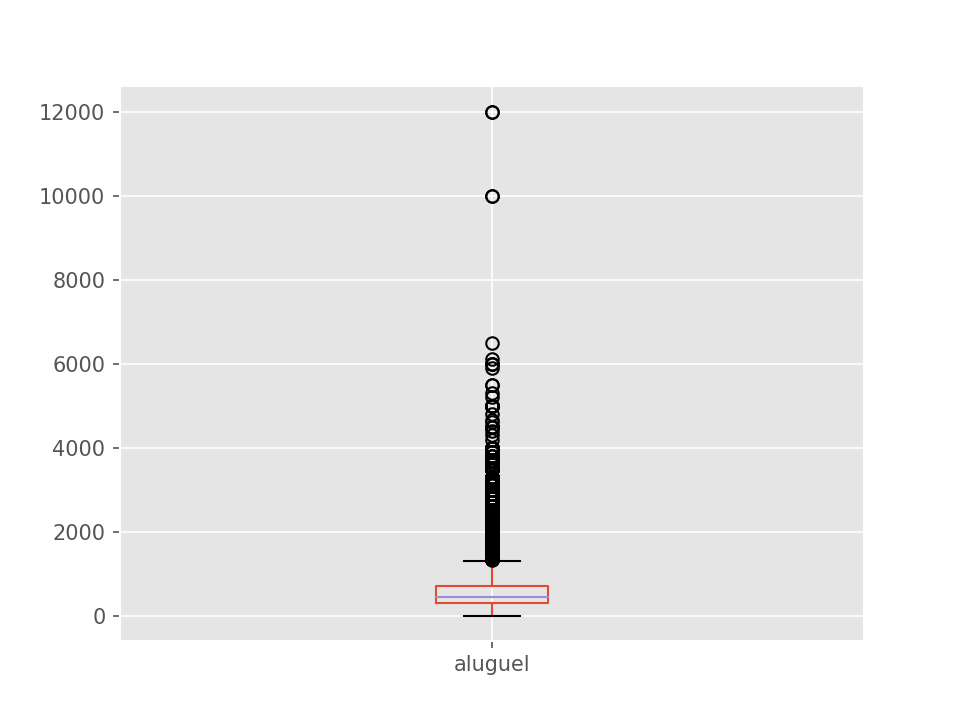

<AxesSubplot:>

In [48]:
# Plota gráfico do tipo Boxplot da coluna bedrooms
# Esse gráfico é muito rico e é possível visualizar Outliers
%matplotlib notebook
matplotlib.style.use('ggplot')

dataset.boxplot(column='aluguel')

<IPython.core.display.Javascript object>


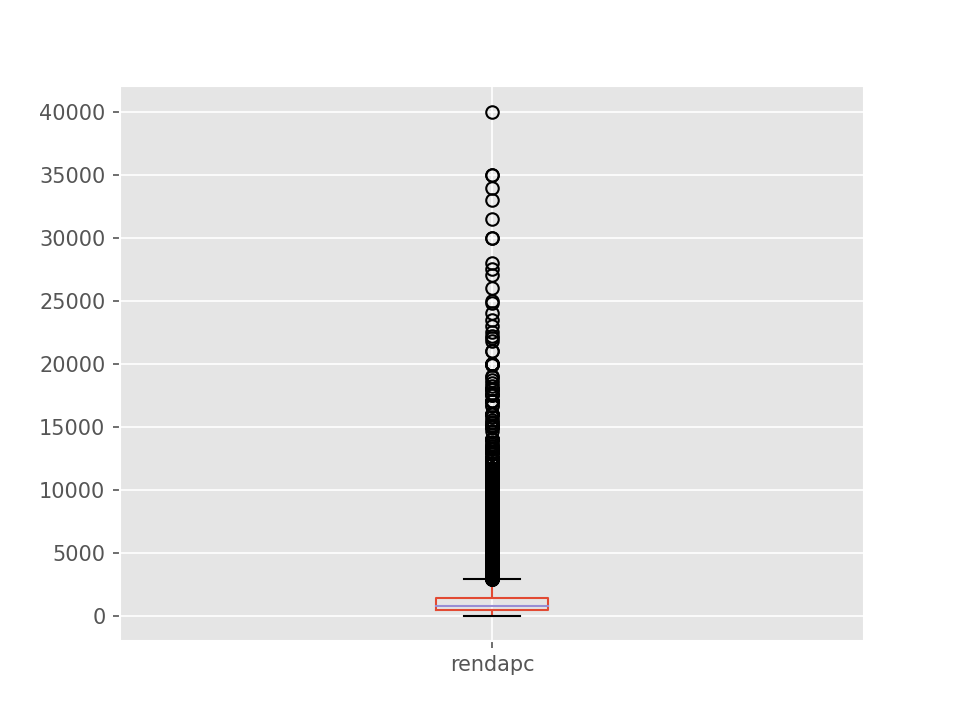

<AxesSubplot:>

In [49]:
# Plota gráfico do tipo Boxplot da coluna rendapc
%matplotlib notebook
matplotlib.style.use('ggplot')

dataset.boxplot(column='rendapc')

<IPython.core.display.Javascript object>


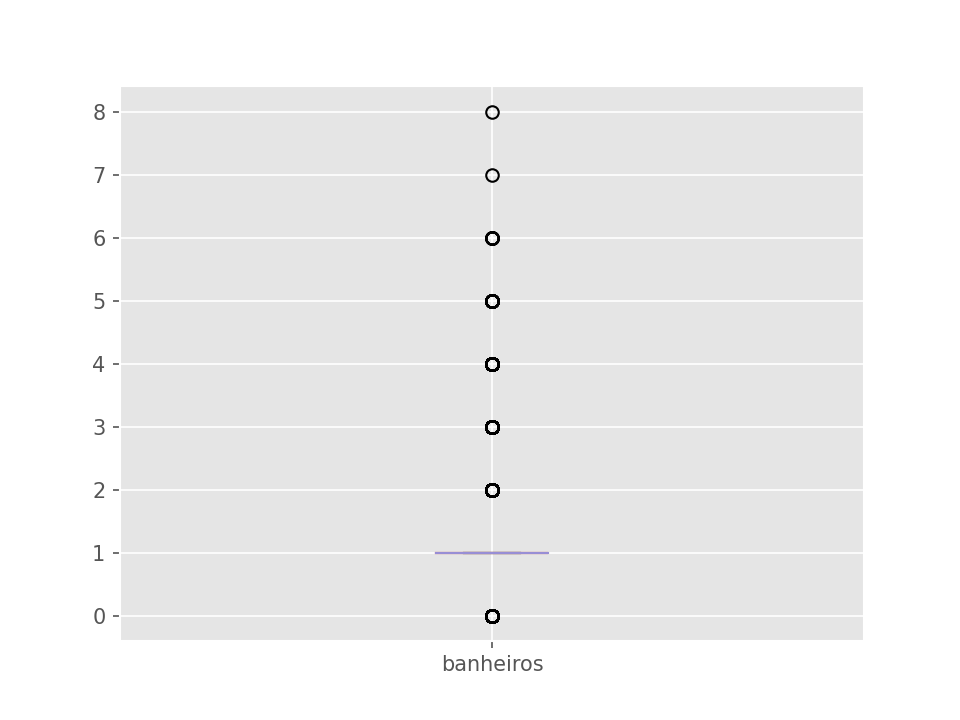

<AxesSubplot:>

In [50]:
# Plota gráfico do tipo Boxplot da coluna bedrooms
%matplotlib notebook
matplotlib.style.use('ggplot')

dataset.boxplot(column='banheiros')

<IPython.core.display.Javascript object>


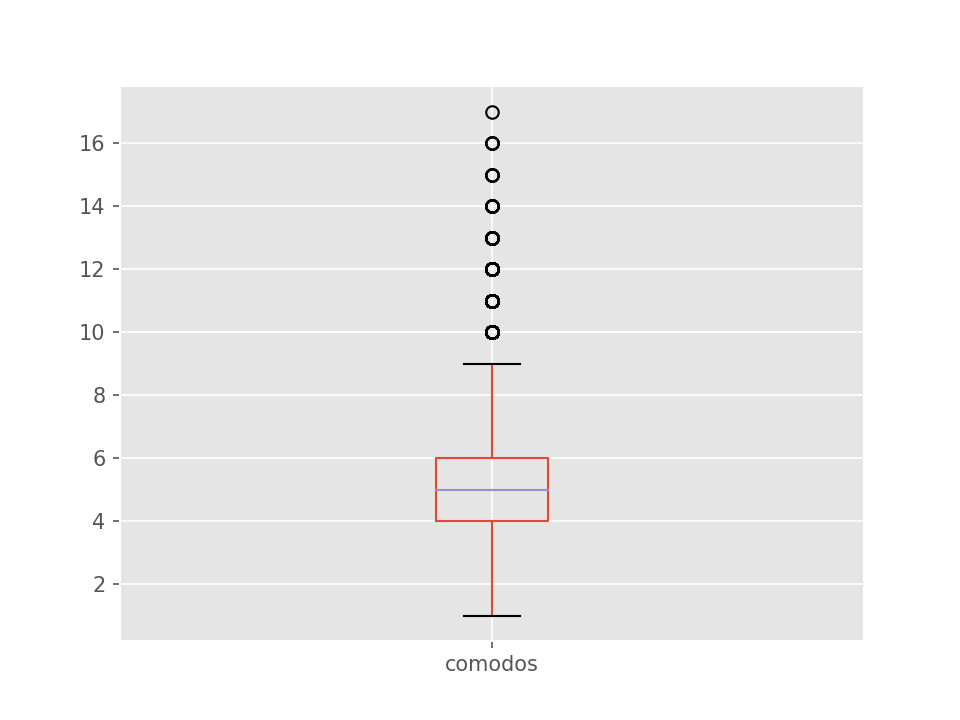

<AxesSubplot:>

In [51]:
# Plota gráfico do tipo Boxplot da coluna comodos
# Esse gráfico é muito rico e é possível visualizar Outliers
%matplotlib notebook
matplotlib.style.use('ggplot')

dataset.boxplot(column='comodos')

<IPython.core.display.Javascript object>


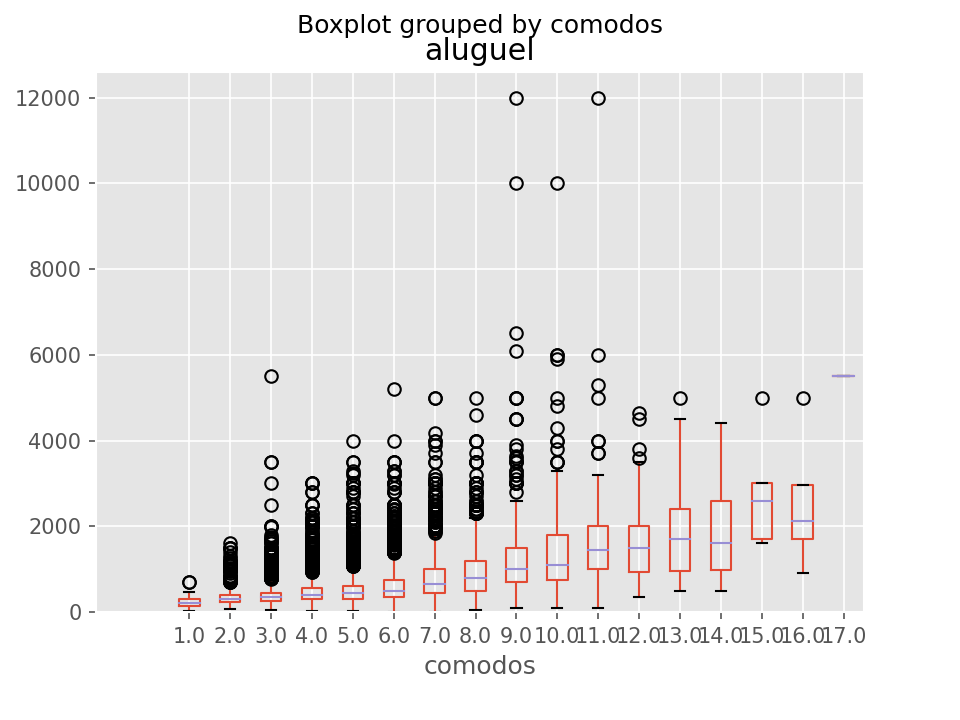

<AxesSubplot:title={'center':'aluguel'}, xlabel='comodos'>

In [52]:
# Plota boxplot da coluna 'aluguel' por número de quartos
%matplotlib notebook
dataset.boxplot(column='aluguel', by='comodos')

In [53]:
dataset.corr()

,ano,controle,moradores,comodos,quartos,aluguel,banheiros,rendapc
ano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
controle,NaN,1.000000,-0.038350,0.090442,0.042752,0.172180,0.067802,0.111884
moradores,NaN,-0.038350,1.000000,0.261334,0.645531,0.006997,0.115576,-0.268250
comodos,NaN,0.090442,0.261334,1.000000,0.517607,0.426117,0.664079,0.216733
quartos,NaN,0.042752,0.645531,0.517607,1.000000,0.177471,0.289448,-0.115687
aluguel,NaN,0.172180,0.006997,0.426117,0.177471,1.000000,0.550711,0.542063
banheiros,NaN,0.067802,0.115576,0.664079,0.289448,0.550711,1.000000,0.333796
rendapc,NaN,0.111884,-0.268250,0.216733,-0.115687,0.542063,0.333796,1.000000


In [54]:
dataset.corr('spearman')

,ano,controle,moradores,comodos,quartos,aluguel,banheiros,rendapc
ano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
controle,NaN,1.000000,-0.041265,0.059791,0.023969,0.325057,0.068767,0.215564
moradores,NaN,-0.041265,1.000000,0.285882,0.679747,0.046937,0.117893,-0.447242
comodos,NaN,0.059791,0.285882,1.000000,0.523312,0.390056,0.574417,0.166819
quartos,NaN,0.023969,0.679747,0.523312,1.000000,0.209649,0.253862,-0.168207
aluguel,NaN,0.325057,0.046937,0.390056,0.209649,1.000000,0.446170,0.503671
banheiros,NaN,0.068767,0.117893,0.574417,0.253862,0.446170,1.000000,0.286564
rendapc,NaN,0.215564,-0.447242,0.166819,-0.168207,0.503671,0.286564,1.000000


In [57]:
# Crosstab ou tabulação Cruzada
# Essa funcionalidade cruza valores das variáveis
# Nesse exemplo podemos ver qual a distribuição dos imóvies por número de quartos com relação a sua condição
# Podemos ver que imoveis com 3 quartos estão mais na condição 5

pd.crosstab(dataset['UF'],dataset['comodos'])

comodos,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0
UF,,,,,,,,,,,,,,,,,
AC,4,24,39,24,38,10,9,3,0,0,0,0,0,0,0,0,0
AL,2,13,16,59,110,47,28,7,1,1,0,0,0,0,0,0,0
AM,7,63,142,125,96,40,20,7,2,1,1,0,0,0,0,0,0
AP,2,9,24,26,21,7,1,3,0,0,0,0,0,0,0,0,0
BA,2,24,90,235,430,233,116,46,24,8,2,1,2,1,0,0,0
CE,1,21,82,276,301,183,92,42,17,7,0,3,1,1,0,0,0
DF,2,53,130,183,263,136,66,34,21,14,5,4,0,2,0,1,0
ES,0,3,31,58,118,86,53,32,16,8,1,1,0,0,0,0,0
GO,0,16,83,189,367,217,108,57,24,12,6,2,3,1,0,0,0


VISUALIZAÇÃO DE DADOS

In [58]:
!pip install plotly

In [59]:
#Importando Matplotlib
from matplotlib import pyplot as plt
from plotly.offline import plot, iplot

In [60]:
matplotlib notebook

SyntaxError: invalid syntax (<ipython-input-60-25cb7e76f1b7>, line 1)

In [61]:
plt.bar(dataset.material_telhado, height=1)

<BarContainer object of 20330 artists>

In [62]:
import cufflinks as cf

In [63]:
cf.go_offline()

In [65]:
dataset.iplot(x='rendapc',
             y='aluguel',
             categories='material_telhado',
             title='Renpc x aluguel')

C:\Users\isabela.mouzinho\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\isabela.mouzinho\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

